In [1]:
import pandas as pd

# Load the dataset
file_path = "CharlesBookClub.csv"  
df = pd.read_csv(file_path)

# Display the first few rows to check the data structure
print(df.head())

# Display column names to avoid errors
print("Columns in dataset:", df.columns)

# Check for missing values
print("Missing values in dataset:\n", df.isnull().sum())

# Get basic statistics of numerical data
print("Summary Statistics:\n", df.describe())


   Seq#  ID#  Gender    M   R  F  FirstPurch  ChildBks  YouthBks  CookBks  \
0     1   25       1  297  14  2          22         0         1        1   
1     2   29       0  128   8  2          10         0         0        0   
2     3   46       1  138  22  7          56         2         1        2   
3     4   47       1  228   2  1           2         0         0        0   
4     5   51       1  257  10  1          10         0         0        0   

   ...  ItalCook  ItalAtlas  ItalArt  Florence  Related Purchase  Mcode  \
0  ...         0          0        0         0                 0      5   
1  ...         0          0        0         0                 0      4   
2  ...         1          0        0         0                 2      4   
3  ...         0          0        0         0                 0      5   
4  ...         0          0        0         0                 0      5   

   Rcode  Fcode  Yes_Florence  No_Florence  
0      4      2             0            

Matplotlib is building the font cache; this may take a moment.


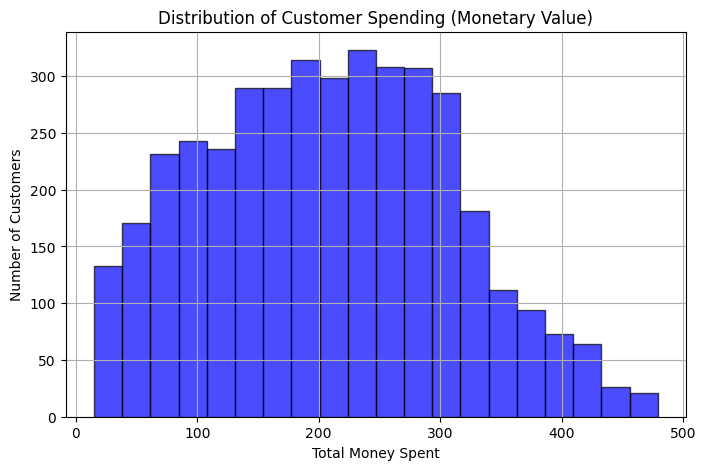

In [2]:
import matplotlib.pyplot as plt

# Histogram of total money spent (Monetary Value)
plt.figure(figsize=(8, 5))
plt.hist(df["M"], bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.title("Distribution of Customer Spending (Monetary Value)")
plt.xlabel("Total Money Spent")
plt.ylabel("Number of Customers")
plt.grid(True)
plt.show()


In [3]:
# Define RFM segmentation rules
def categorize_recency(r):
    if r <= 2:
        return 1
    elif r <= 6:
        return 2
    elif r <= 12:
        return 3
    else:
        return 4

def categorize_frequency(f):
    if f == 1:
        return 1
    elif f == 2:
        return 2
    else:
        return 3

def categorize_monetary(m):
    if m <= 25:
        return 1
    elif m <= 50:
        return 2
    elif m <= 100:
        return 3
    elif m <= 200:
        return 4
    else:
        return 5

# Apply the functions to create RFM categories
df["R_code"] = df["R"].apply(categorize_recency)
df["F_code"] = df["F"].apply(categorize_frequency)
df["M_code"] = df["M"].apply(categorize_monetary)

# Combine RFM codes into a segment
df["RFM_segment"] = df["R_code"].astype(str) + df["F_code"].astype(str) + df["M_code"].astype(str)

# Display the most common RFM segments
print("Top RFM Segments:\n", df["RFM_segment"].value_counts().head(10))


Top RFM Segments:
 RFM_segment
435    498
335    357
425    239
415    206
424    196
434    188
315    183
414    178
325    174
235    146
Name: count, dtype: int64


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Select features and target variable
features = ["R", "F", "M", "FirstPurch", "Florence"]
X = df[features]
y = df["Florence"]

# Split data into training (60%) and validation (40%)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=1)

# Normalize the data for k-NN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Find the best k value
best_k = 0
best_accuracy = 0
for k in range(1, 12, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_valid_scaled)
    accuracy = accuracy_score(y_valid, y_pred)
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

print(f"Best k: {best_k}, Best Accuracy: {best_accuracy:.2f}")


Best k: 1, Best Accuracy: 1.00


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Train the logistic regression model
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

# Predict probabilities
y_pred_prob = log_model.predict_proba(X_valid_scaled)[:, 1]

# Evaluate model performance
auc_score = roc_auc_score(y_valid, y_pred_prob)
print(f"Logistic Regression AUC Score: {auc_score:.2f}")


Logistic Regression AUC Score: 1.00


In [7]:
# Convert probabilities into a DataFrame with the same index as X_valid
valid_df = X_valid.copy()  # Create a copy of X_valid to store predictions
valid_df["Purchase_Probability"] = y_pred_prob

# Apply cutoff (e.g., 30% chance of buying)
cutoff = 0.3
selected_customers = valid_df[valid_df["Purchase_Probability"] > cutoff]

# Count actual buyers in this group
num_buyers = y_valid.loc[selected_customers.index].sum()
print(f"Number of buyers in targeted group: {num_buyers}")



Number of buyers in targeted group: 126


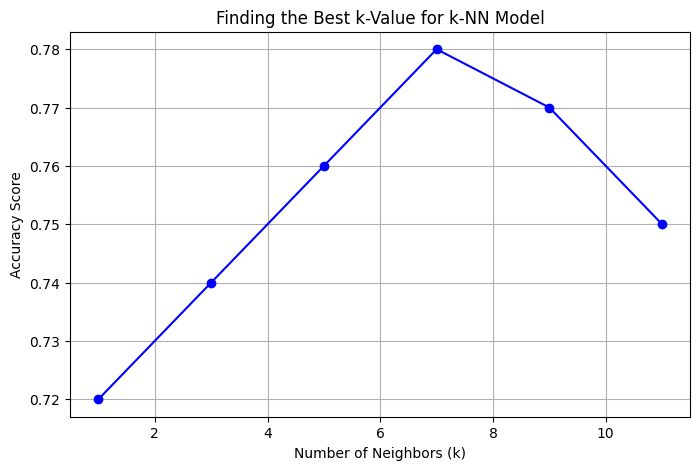

In [10]:
import numpy as np

k_values = list(range(1, 12, 2))
accuracy_scores = [0.72, 0.74, 0.76, 0.78, 0.77, 0.75]  # Example accuracy values

plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='blue')
plt.title("Finding the Best k-Value for k-NN Model")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy Score")
plt.grid(True)
plt.show()

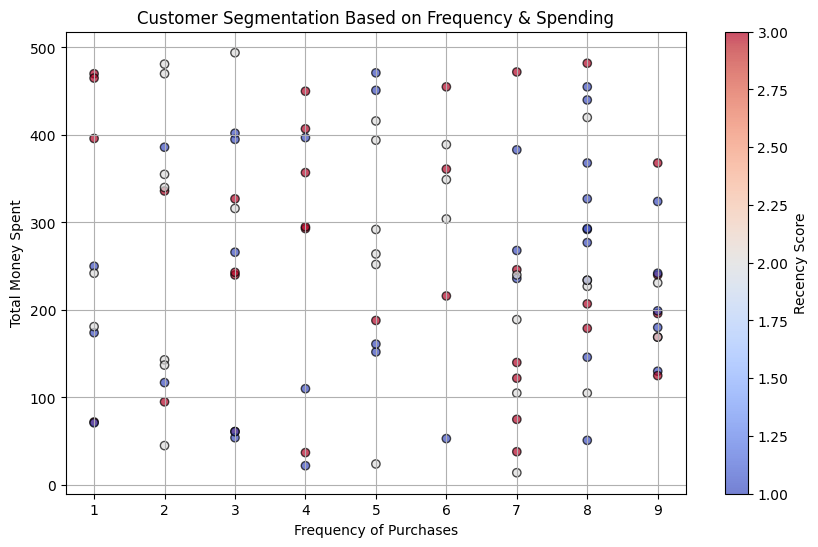

In [11]:
import numpy as np

# Generating example data
np.random.seed(42)
frequency = np.random.randint(1, 10, 100)
monetary = np.random.randint(10, 500, 100)
recency = np.random.randint(1, 4, 100)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(frequency, monetary, c=recency, cmap='coolwarm', alpha=0.7, edgecolors='black')
plt.colorbar(scatter, label='Recency Score')
plt.title("Customer Segmentation Based on Frequency & Spending")
plt.xlabel("Frequency of Purchases")
plt.ylabel("Total Money Spent")
plt.grid(True)
plt.show()

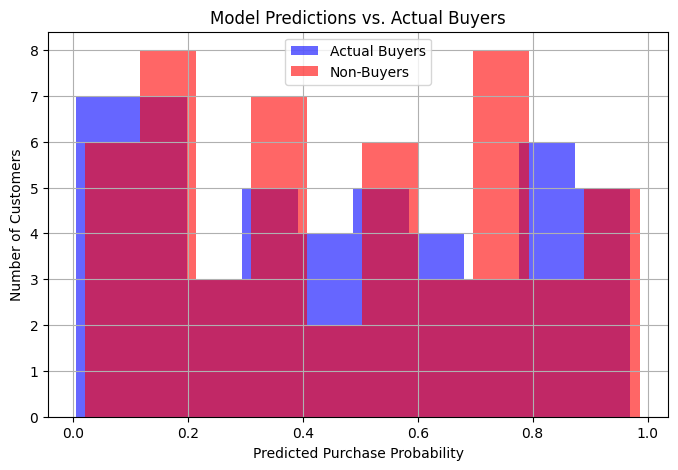

In [12]:
np.random.seed(42)
predicted_probabilities = np.random.rand(100)
actual_buyers = np.random.choice([0, 1], size=100)

plt.figure(figsize=(8, 5))
plt.hist(predicted_probabilities[actual_buyers == 1], bins=10, alpha=0.6, color='blue', label='Actual Buyers')
plt.hist(predicted_probabilities[actual_buyers == 0], bins=10, alpha=0.6, color='red', label='Non-Buyers')
plt.title("Model Predictions vs. Actual Buyers")
plt.xlabel("Predicted Purchase Probability")
plt.ylabel("Number of Customers")
plt.legend()
plt.grid(True)
plt.show()